# Import necessary libraries

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prettytable import PrettyTable
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset

In [2]:
# Download latest version
path = kagglehub.dataset_download("yutodennou/construction-investment-amount-in-japan")

print("Path to dataset files:", path)

# List the files in the directory
print("Files in the dataset directory:", os.listdir(path))


Path to dataset files: /root/.cache/kagglehub/datasets/yutodennou/construction-investment-amount-in-japan/versions/1
Files in the dataset directory: ['Construction_investment_amount_in_japan.csv']


# Exploratory Data Analysis

In [3]:
data_file = os.path.join(path, "Construction_investment_amount_in_japan.csv")

# Load the dataset
df = pd.read_csv(data_file)

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 28 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Construction_Investment                                                                            378 non-null    object 
 1   Year                                                                                               378 non-null    int64  
 2   Value                                                                                              378 non-null    object 
 3   Total                                                                                              376 non-null    float64
 4   Architecture_Total                                                                                 376 non-null    float64

In [4]:
print(df.head())

  Construction_Investment  Year Value     Total  Architecture_Total  \
0                  amount  2022  real  669900.0            434000.0   
1                  amount  2021  real  666000.0            425800.0   
2                  amount  2020  real  653600.0            405300.0   
3                  amount  2019  real  623280.0            401817.0   
4                  amount  2018  real  618271.0            404856.0   

   Architecture_Residential  Architecture_Residential_Government  \
0                  163100.0                               3400.0   
1                  164700.0                               3600.0   
2                  156800.0                               4200.0   
3                  167478.0                               4358.0   
4                  172580.0                               5214.0   

   Architecture_Residential_Private  Architecture_Non Residential  \
0                          159700.0                      157600.0   
1                         

## Check for NULL values

In [5]:
# Count missing values in each column
print(df.isnull().sum().sort_values(ascending=False))


Architecture_Building Repairs_Government                                                             332
Architecture_Building Repairs(Renovation or Remodeling)                                              332
Architecture_Building Repairs_Private                                                                332
Architecture_Non Residential_Private_Mining and Industry                                              20
Architecture_Non Residential_Private_Other                                                            20
Civil Engineering_Total                                                                                2
Repeated_Civil Engineering_Private                                                                     2
Repeated_Civil Engineering_Government                                                                  2
Repeated_Architecture_Private                                                                          2
Repeated_Architecture_Government                       

In [6]:
df = df.drop(columns=[
    'Architecture_Building Repairs(Renovation or Remodeling)',
    'Architecture_Building Repairs_Government',
    'Architecture_Building Repairs_Private'
])


## Handling missing values

In [7]:
columns_to_fill = [
    'Architecture_Non Residential_Private_Mining and Industry',
    'Architecture_Non Residential_Private_Other'
]

# Fill missing values with the mean of each column
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())


In [8]:
# List of columns with few missing values
few_missing_columns = [
    'Total', 'Architecture_Total', 'Architecture_Residential',
    'Architecture_Residential_Government', 'Architecture_Residential_Private',
    'Architecture_Non Residential', 'Architecture_Non Residential_Government',
    'Architecture_Non Residential_Private', 'Civil Engineering_Total',
    'Civil Engineering_Government', 'Civil Engineering_Government_Public Projects',
    'Civil Engineering_Government_Other', 'Civil Engineering_Private',
    'Repeated_Total_Government', 'Repeated_Total_Private',
    'Repeated_Architecture_Government', 'Repeated_Architecture_Private',
    'Repeated_Civil Engineering_Government', 'Repeated_Civil Engineering_Private',
    'Repeated_Private_Non Residential Construction(Non Residential Architecture and Civil Engineering)'
]

# Fill missing values with the mean
df[few_missing_columns] = df[few_missing_columns].fillna(df[few_missing_columns].mean())


In [9]:
# Count missing values in each column
print(df.isnull().sum())


Construction_Investment                                                                              0
Year                                                                                                 0
Value                                                                                                0
Total                                                                                                0
Architecture_Total                                                                                   0
Architecture_Residential                                                                             0
Architecture_Residential_Government                                                                  0
Architecture_Residential_Private                                                                     0
Architecture_Non Residential                                                                         0
Architecture_Non Residential_Government                                  

In [10]:
# Get summary statistics for numeric columns
print(df.describe())


              Year          Total  Architecture_Total  \
count   378.000000     378.000000          378.000000   
mean   1991.000000  178093.624734       104439.956649   
std      18.208343  282384.446467       165224.107467   
min    1960.000000       0.000000            0.100000   
25%    1975.000000      11.175000           12.500000   
50%    1991.000000     100.000000           59.400000   
75%    2007.000000  426268.250000       241430.250000   
max    2022.000000  939187.000000       597567.000000   

       Architecture_Residential  Architecture_Residential_Government  \
count                378.000000                           378.000000   
mean               57314.095479                          2788.393883   
std                90724.240702                          4614.229222   
min                    0.000000                             0.200000   
25%                   13.650000                             1.900000   
50%                   32.850000                       

In [11]:
# Print column names
print(df.columns)


Index(['Construction_Investment', 'Year', 'Value', 'Total',
       'Architecture_Total', 'Architecture_Residential',
       'Architecture_Residential_Government',
       'Architecture_Residential_Private', 'Architecture_Non Residential',
       'Architecture_Non Residential_Government',
       'Architecture_Non Residential_Private',
       'Architecture_Non Residential_Private_Mining and Industry',
       'Architecture_Non Residential_Private_Other', 'Civil Engineering_Total',
       'Civil Engineering_Government',
       'Civil Engineering_Government_Public Projects',
       'Civil Engineering_Government_Other', 'Civil Engineering_Private',
       'Repeated_Total_Government', 'Repeated_Total_Private',
       'Repeated_Architecture_Government', 'Repeated_Architecture_Private',
       'Repeated_Civil Engineering_Government',
       'Repeated_Civil Engineering_Private',
       'Repeated_Private_Non Residential Construction(Non Residential Architecture and Civil Engineering)'],
      dtyp

## Plot for Total Investment over the years

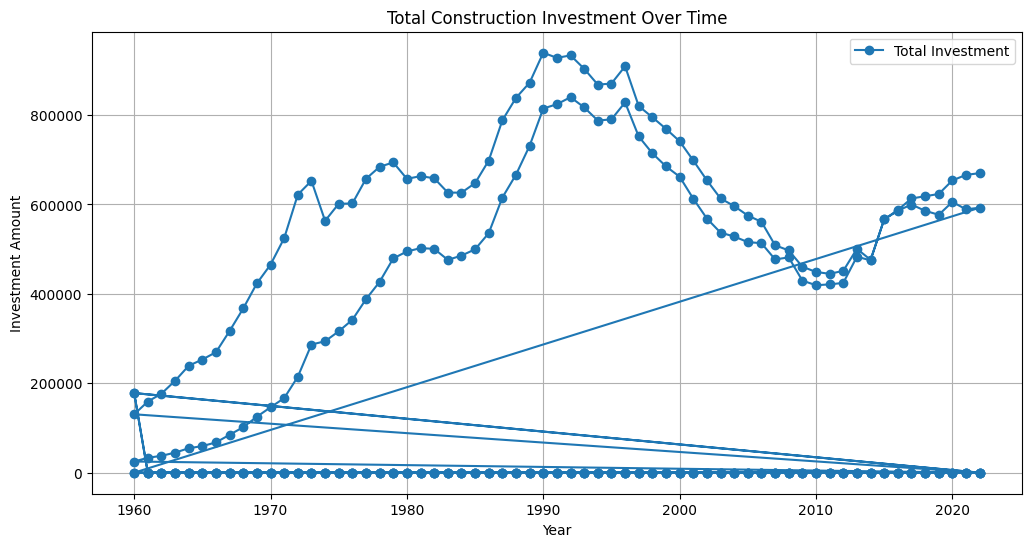

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Total'], marker='o', label='Total Investment')
plt.title('Total Construction Investment Over Time')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.grid()
plt.legend()
plt.show()


## Plot to Compare Architecture and Civil Engineering Investments

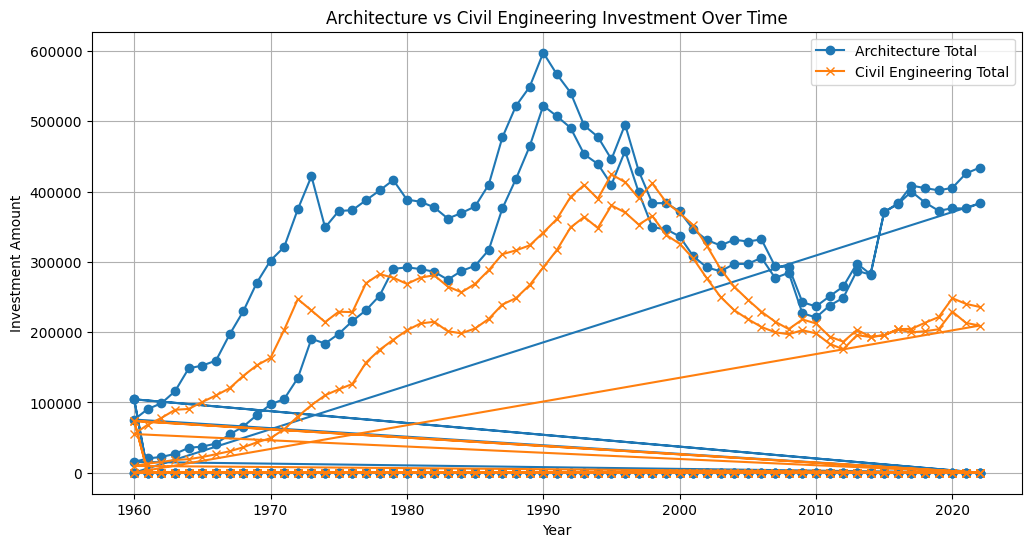

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Architecture_Total'], label='Architecture Total', marker='o')
plt.plot(df['Year'], df['Civil Engineering_Total'], label='Civil Engineering Total', marker='x')
plt.title('Architecture vs Civil Engineering Investment Over Time')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()


## Plot to Calculate Year-on-Year Percentage Change for Total Investment

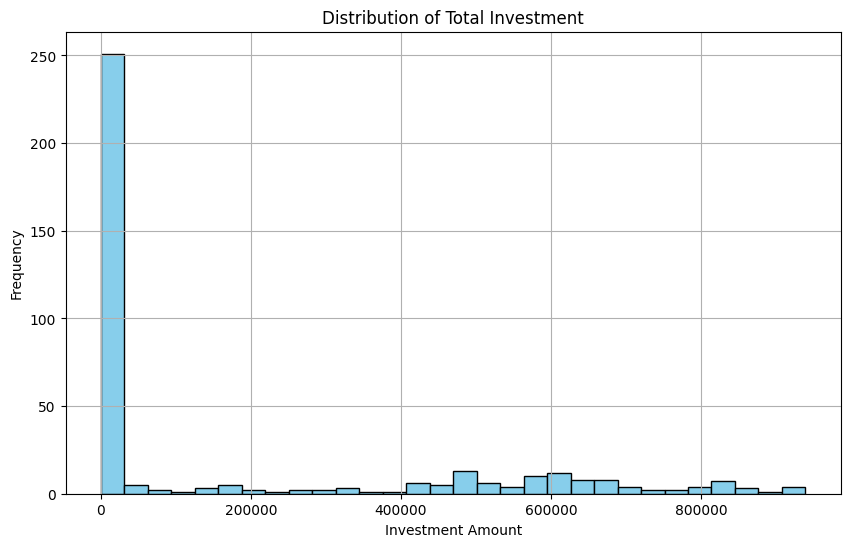

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Total'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Investment')
plt.xlabel('Investment Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


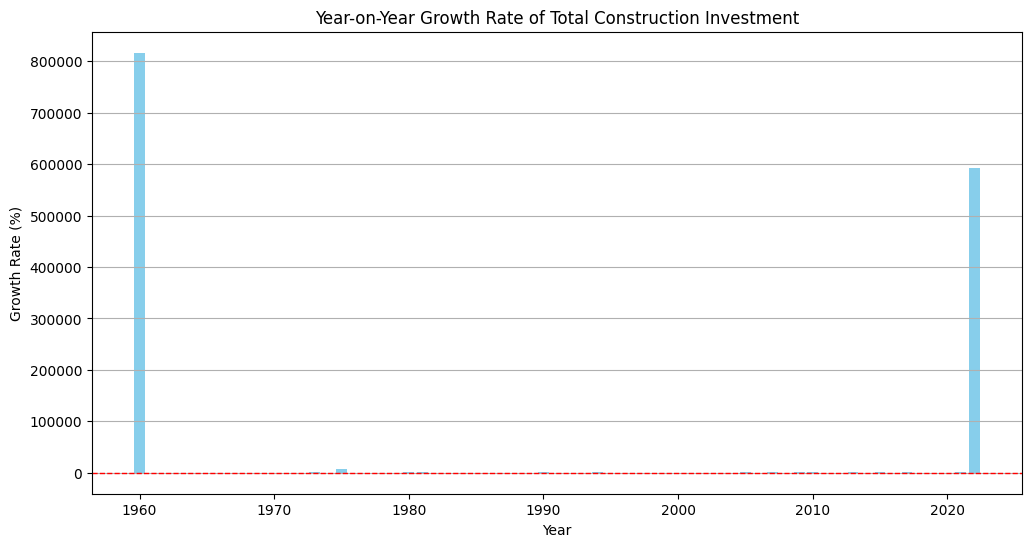

In [15]:
df['Total_Growth_Rate'] = df['Total'].pct_change() * 100

# Plot Year-on-Year Growth Rate
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Total_Growth_Rate'], color='skyblue')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Year-on-Year Growth Rate of Total Construction Investment')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(axis='y')
plt.show()


In [16]:
# Correlation between investment categories
correlation = df[['Total', 'Architecture_Total', 'Civil Engineering_Total']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                            Total  Architecture_Total  Civil Engineering_Total
Total                    1.000000            0.995191                 0.990717
Architecture_Total       0.995191            1.000000                 0.972637
Civil Engineering_Total  0.990717            0.972637                 1.000000


## Removing outliers using 99th percentile for Capped Growth Rate

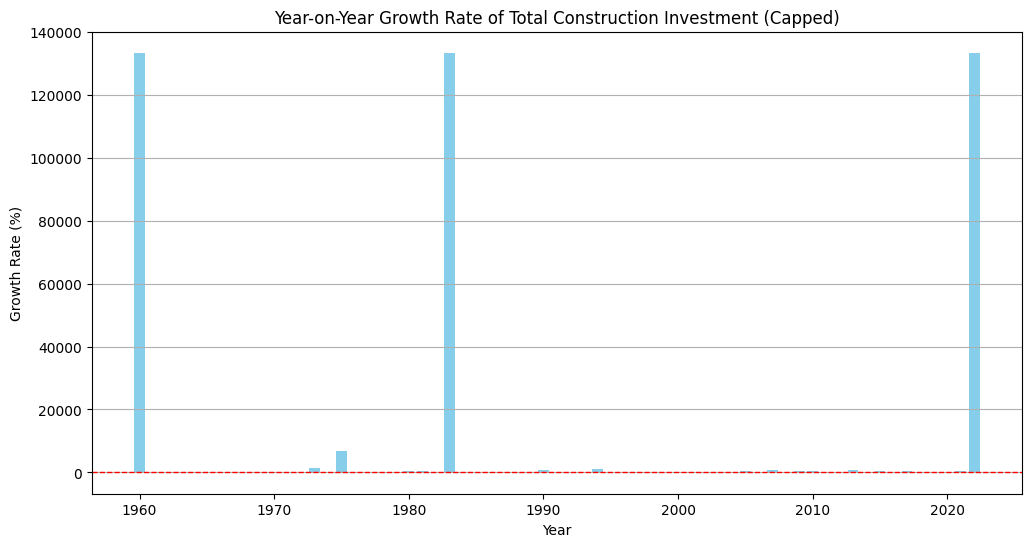

In [17]:
# Cap growth rates to remove outliers (99th percentile)
growth_rate_cap = np.percentile(df['Total_Growth_Rate'].dropna(), 99)
df['Capped_Growth_Rate'] = np.clip(df['Total_Growth_Rate'], a_min=None, a_max=growth_rate_cap)

# Re-plot growth rates after capping
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Capped_Growth_Rate'], color='skyblue')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Year-on-Year Growth Rate of Total Construction Investment (Capped)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(axis='y')
plt.show()


## Plot for Proportions

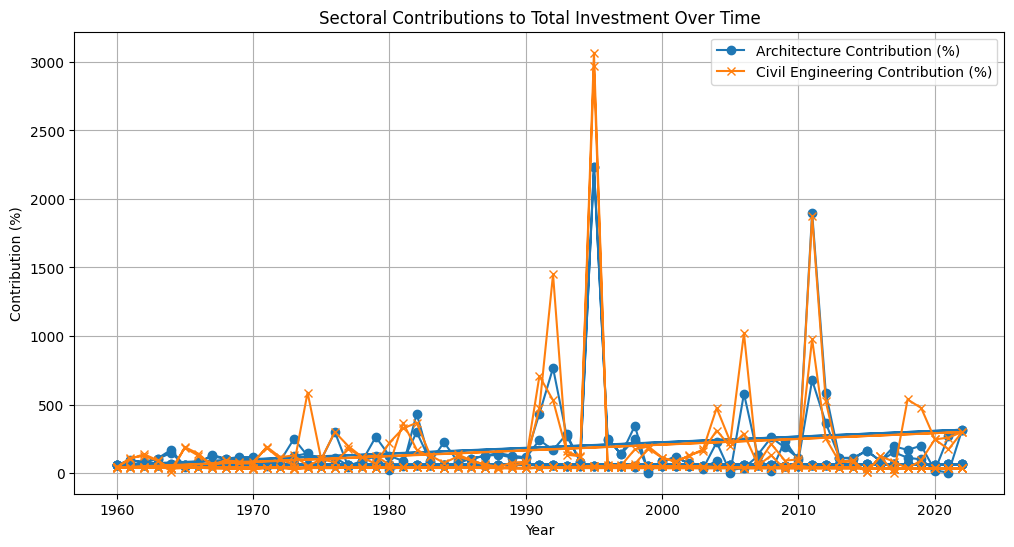

In [18]:
# Calculate proportions
df['Architecture_Contribution'] = (df['Architecture_Total'] / df['Total']) * 100
df['Civil_Engineering_Contribution'] = (df['Civil Engineering_Total'] / df['Total']) * 100

# Plot proportions
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Architecture_Contribution'], label='Architecture Contribution (%)', marker='o')
plt.plot(df['Year'], df['Civil_Engineering_Contribution'], label='Civil Engineering Contribution (%)', marker='x')
plt.title('Sectoral Contributions to Total Investment Over Time')
plt.xlabel('Year')
plt.ylabel('Contribution (%)')
plt.legend()
plt.grid()
plt.show()


In [19]:
# Identify years with extreme architecture contributions
extreme_architecture_years = df[df['Architecture_Contribution'] > 200]['Year']
print("Years with Extreme Architecture Contribution:", extreme_architecture_years.tolist())

# Identify years with extreme civil engineering contributions
extreme_civil_years = df[df['Civil_Engineering_Contribution'] > 200]['Year']
print("\nYears with Extreme Civil Engineering Contribution:", extreme_civil_years.tolist())

# Identify years with extreme growth rates
extreme_growth_years = df[df['Capped_Growth_Rate'] > 100]['Year']
print("\nYears with Extreme Growth Rates:", extreme_growth_years.tolist())


Years with Extreme Architecture Contribution: [2022, 2021, 2012, 2011, 2008, 2006, 2004, 1998, 1996, 1995, 1993, 1991, 1984, 1982, 2022, 2012, 2011, 2009, 1998, 1996, 1995, 1993, 1992, 1991, 1984, 1982, 1979, 1976, 1973]

Years with Extreme Civil Engineering Contribution: [2022, 2020, 2019, 2018, 2012, 2011, 2006, 2005, 2004, 1995, 1992, 1991, 1982, 1981, 1980, 1974, 2022, 2021, 2020, 2012, 2011, 2008, 2006, 2004, 1995, 1992, 1991, 1984, 1981, 1976]

Years with Extreme Growth Rates: [2021, 2020, 2017, 2015, 2013, 2010, 2009, 2007, 2005, 2003, 1994, 1990, 1983, 1981, 1980, 1979, 1973, 1964, 1961, 1960, 2022, 2021, 2015, 2013, 2010, 2009, 2007, 2003, 1997, 1994, 1990, 1987, 1983, 1980, 1978, 1977, 1975, 1974, 1972, 1964, 1960]


## Replotting normalized contributions

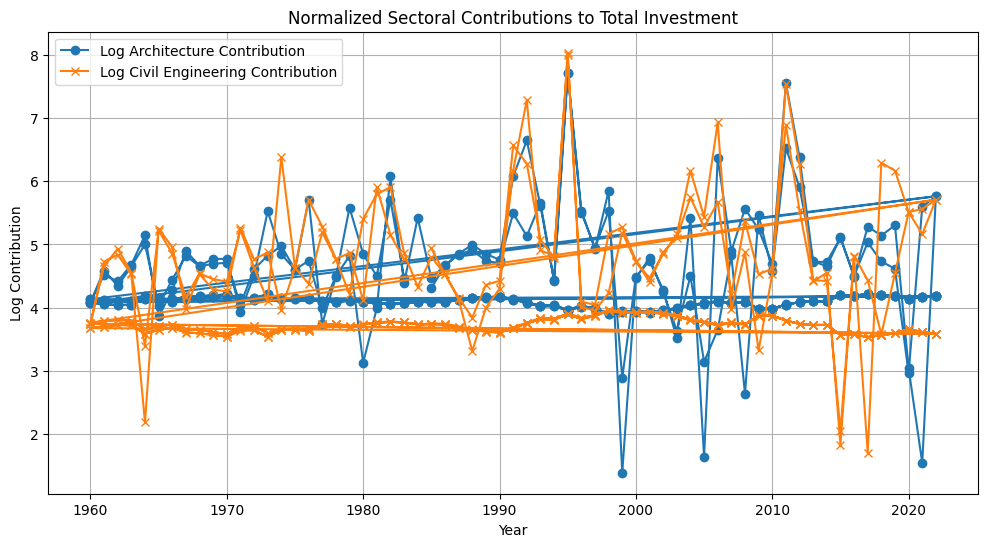

In [20]:
# Apply log transformation to contributions
df['Log_Architecture_Contribution'] = np.log1p(df['Architecture_Contribution'])
df['Log_Civil_Engineering_Contribution'] = np.log1p(df['Civil_Engineering_Contribution'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Log_Architecture_Contribution'], label='Log Architecture Contribution', marker='o')
plt.plot(df['Year'], df['Log_Civil_Engineering_Contribution'], label='Log Civil Engineering Contribution', marker='x')
plt.title('Normalized Sectoral Contributions to Total Investment')
plt.xlabel('Year')
plt.ylabel('Log Contribution')
plt.legend()
plt.grid()
plt.show()


## Plot of filtered data for years after 2000

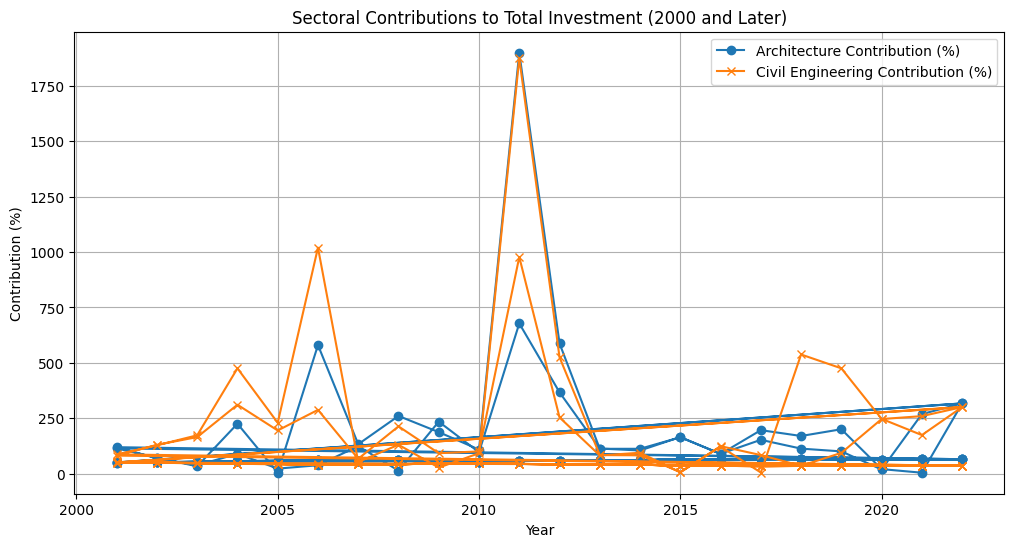

In [21]:
recent_data = df[df['Year'] > 2000]

# Plot sectoral contributions for recent decades
plt.figure(figsize=(12, 6))
plt.plot(recent_data['Year'], recent_data['Architecture_Contribution'], label='Architecture Contribution (%)', marker='o')
plt.plot(recent_data['Year'], recent_data['Civil_Engineering_Contribution'], label='Civil Engineering Contribution (%)', marker='x')
plt.title('Sectoral Contributions to Total Investment (2000 and Later)')
plt.xlabel('Year')
plt.ylabel('Contribution (%)')
plt.legend()
plt.grid()
plt.show()


In [22]:
# Focus on extreme years for architecture contributions
extreme_arch_years = df[df['Year'].isin([2012, 2011, 2006, 1998, 1996])]

# Focus on extreme years for civil engineering contributions
extreme_civil_years = df[df['Year'].isin([2020, 2012, 2006, 1995, 1992])]

# Display the data for these years
print("\n\nExtreme Architecture Contribution Years:")
print(extreme_arch_years[['Year', 'Total', 'Architecture_Contribution']])
print("\n\nExtreme Civil Engineering Contribution Years:")
print(extreme_civil_years[['Year', 'Total', 'Civil_Engineering_Contribution']])




Extreme Architecture Contribution Years:
     Year     Total  Architecture_Contribution
10   2012  424493.0                  58.631827
11   2011  421139.0                  56.454757
16   2006  513281.0                  59.584516
24   1998  714269.0                  48.877244
26   1996  828077.0                  55.277710
73   2012       0.8                 587.500000
74   2011       0.4                1900.000000
79   2006       0.5                 580.000000
87   1998       5.0                 250.000000
89   1996       4.8                 243.750000
136  2012     100.0                  58.600000
137  2011     100.0                  56.500000
142  2006     100.0                  59.600000
150  1998     100.0                  48.900000
152  1996     100.0                  55.300000
199  2012  451384.0                  58.702790
200  2011  444809.0                  56.438831
205  2006  561079.0                  59.170099
213  1998  794871.0                  48.223171
215  1996  908858

# Prepare data

In [23]:
X = df['Year'].values.reshape(-1, 1)  # Features: Year
y = df['Total'].values  # Target: Total investment

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision Tree Regressor


Decision Tree MSE on Test Data: 95958359398.38269

Decision Tree MAE on Test Data: 262570.7635457972

Decision Tree R^2 Score on Test Data: -0.16246855284514816




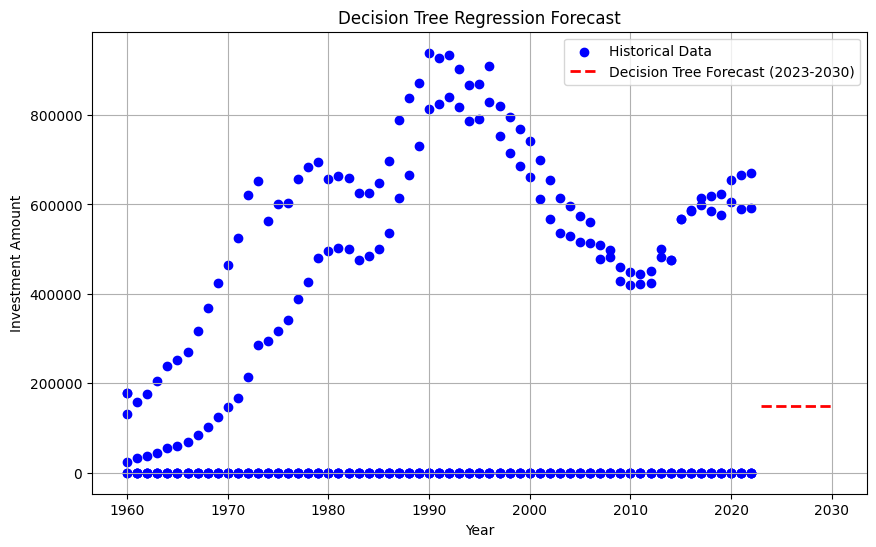

In [24]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Test predictions
dt_test_predictions = dt_model.predict(X_test)

# Forecast future years (2023-2030)
future_years = np.arange(2023, 2031).reshape(-1, 1)  # Future years
dt_forecast = dt_model.predict(future_years)

# Evaluate performance
dt_mse = mean_squared_error(y_test, dt_test_predictions)
dt_mae = mean_absolute_error(y_test, dt_test_predictions)
dt_r2 = r2_score(y_test, dt_test_predictions)

print("\nDecision Tree MSE on Test Data:", dt_mse)
print("\nDecision Tree MAE on Test Data:", dt_mae)
print("\nDecision Tree R^2 Score on Test Data:", dt_r2)
print("\n")

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Historical Data', color='blue')
plt.plot(future_years, dt_forecast, '--r', label='Decision Tree Forecast (2023-2030)', linewidth=2)
plt.title('Decision Tree Regression Forecast')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()


## Hyperparameter tuning with GridSearchCV for Decision Tree Regressor


Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}

Best Decision Tree MSE on Test Data: 83175713430.16109

Best Decision Tree MAE on Test Data: 244022.73553737058

Best Decision Tree R^2 Score on Test Data: -0.007615718205492117




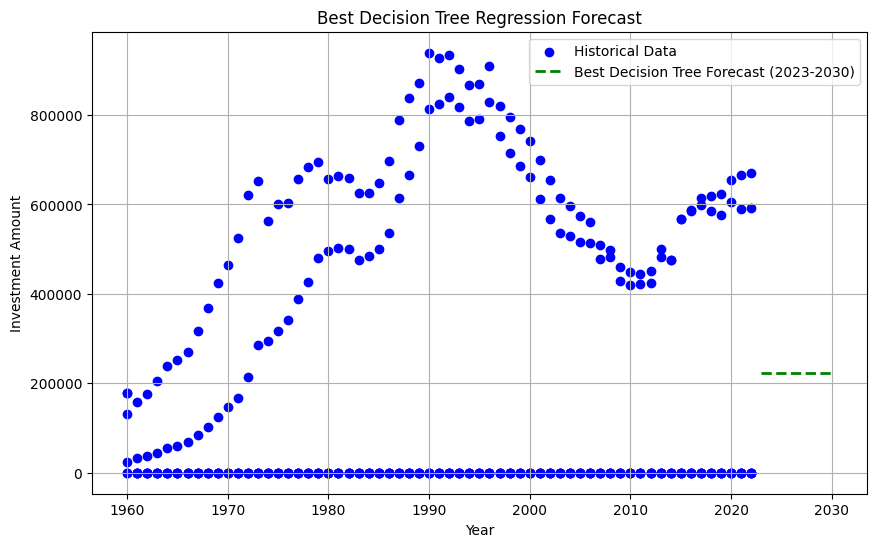

In [25]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_dt_model = grid_search.best_estimator_
print("\nBest Decision Tree Parameters:", grid_search.best_params_)

# Evaluate the best model
best_test_predictions = best_dt_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_test_predictions)
best_mae = mean_absolute_error(y_test, best_test_predictions)
best_r2 = r2_score(y_test, best_test_predictions)

print("\nBest Decision Tree MSE on Test Data:", best_mse)
print("\nBest Decision Tree MAE on Test Data:", best_mae)
print("\nBest Decision Tree R^2 Score on Test Data:", best_r2)
print("\n")

# Forecast with the best model
best_forecast = best_dt_model.predict(future_years)

# Plot results for the best model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Historical Data', color='blue')
plt.plot(future_years, best_forecast, '--g', label='Best Decision Tree Forecast (2023-2030)', linewidth=2)
plt.title('Best Decision Tree Regression Forecast')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()


## Learning Curve for Decision Tree Regressor

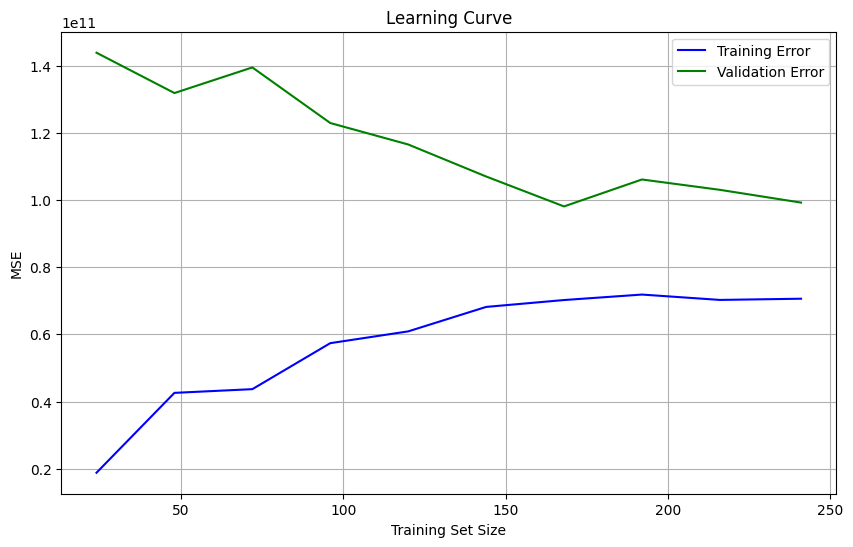

In [26]:
# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeRegressor(max_depth=5, random_state=42),
    X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='green')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()


# Random Forest Regressor


Random Forest MSE on Test Data: 91049430967.64827

Random Forest MAE on Test Data: 257455.58830839503

Random Forest R^2 Score on Test Data: -0.10300031094654383




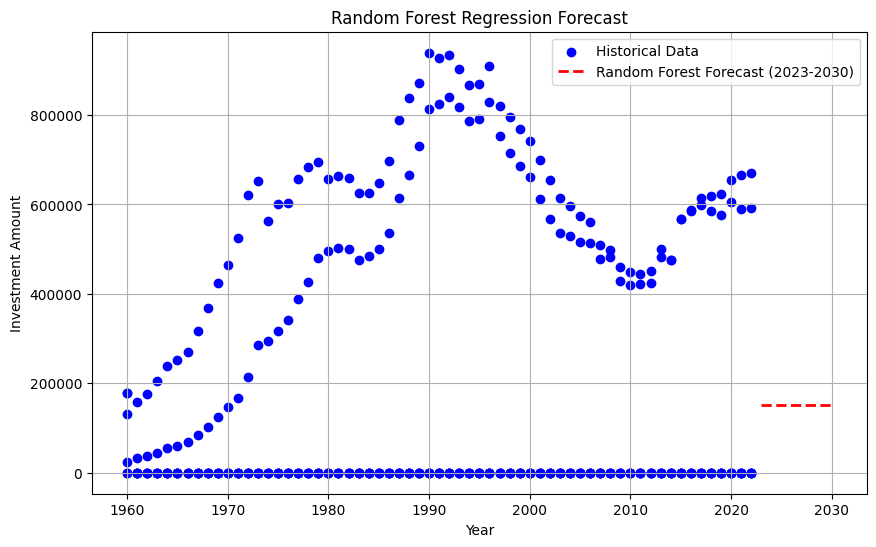

In [27]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Test predictions
rf_test_predictions = rf_model.predict(X_test)

# Forecast future years (2023-2030)
future_years = np.arange(2023, 2031).reshape(-1, 1)  # Future years
rf_forecast = rf_model.predict(future_years)

# Evaluate performance
rf_mse = mean_squared_error(y_test, rf_test_predictions)
rf_mae = mean_absolute_error(y_test, rf_test_predictions)
rf_r2 = r2_score(y_test, rf_test_predictions)

print("\nRandom Forest MSE on Test Data:", rf_mse)
print("\nRandom Forest MAE on Test Data:", rf_mae)
print("\nRandom Forest R^2 Score on Test Data:", rf_r2)
print("\n")

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Historical Data', color='blue')
plt.plot(future_years, rf_forecast, '--r', label='Random Forest Forecast (2023-2030)', linewidth=2)
plt.title('Random Forest Regression Forecast')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()



## Hyperparameter tuning with GridSearchCV for Random Forest Regressor

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Random Forest Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Best Random Forest MSE on Test Data: 83659828474.57303

Best Random Forest MAE on Test Data: 247738.77920834944

Best Random Forest R^2 Score on Test Data: -0.013480434094930382




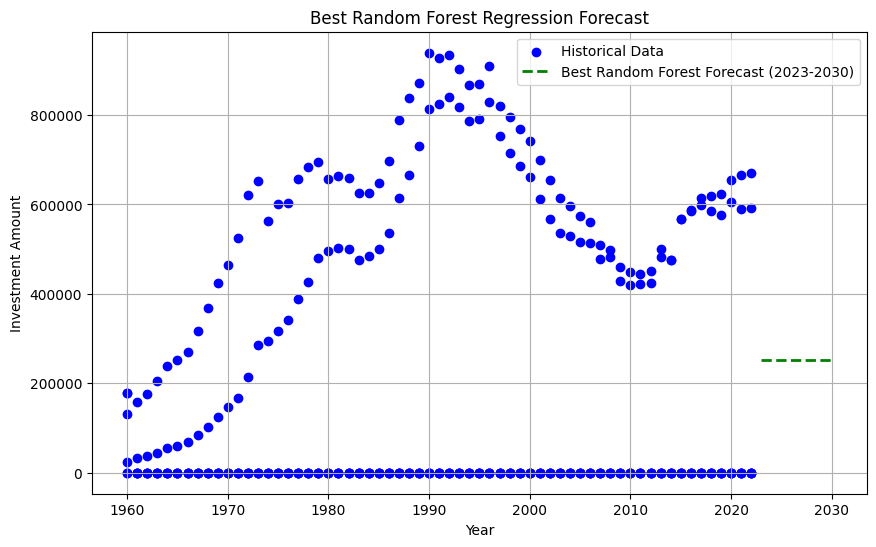

In [28]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_test_predictions = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_test_predictions)
best_rf_mae = mean_absolute_error(y_test, best_rf_test_predictions)
best_rf_r2 = r2_score(y_test, best_rf_test_predictions)

print("\nBest Random Forest MSE on Test Data:", best_rf_mse)
print("\nBest Random Forest MAE on Test Data:", best_rf_mae)
print("\nBest Random Forest R^2 Score on Test Data:", best_rf_r2)
print("\n")

# Forecast with the best model
best_rf_forecast = best_rf_model.predict(future_years)

# Plot results for the best model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Historical Data', color='blue')
plt.plot(future_years, best_rf_forecast, '--g', label='Best Random Forest Forecast (2023-2030)', linewidth=2)
plt.title('Best Random Forest Regression Forecast')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()



## Learning Curve for Random Forest Regressor

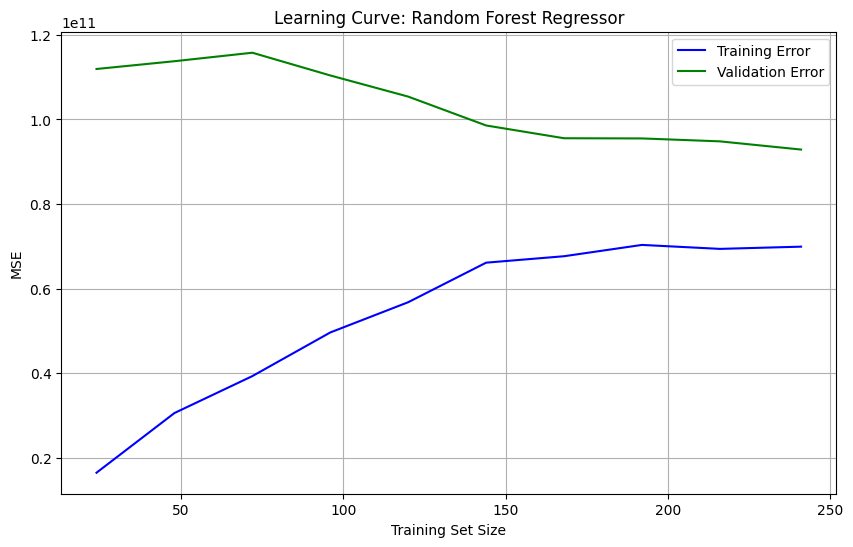

In [29]:
# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='green')
plt.title("Learning Curve: Random Forest Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

#Normalize using Min-Max Scaling

In [30]:
# Normalize using Min-Max Scaling (0-1 range)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Alternatively, standardize using z-score (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression model


Linear Regression MSE on Test Data: 82503321165.11003

Linear Regression MAE on Test Data: 244338.64313631706

Linear Regression R^2 Score on Test Data: 0.0005298448095352182




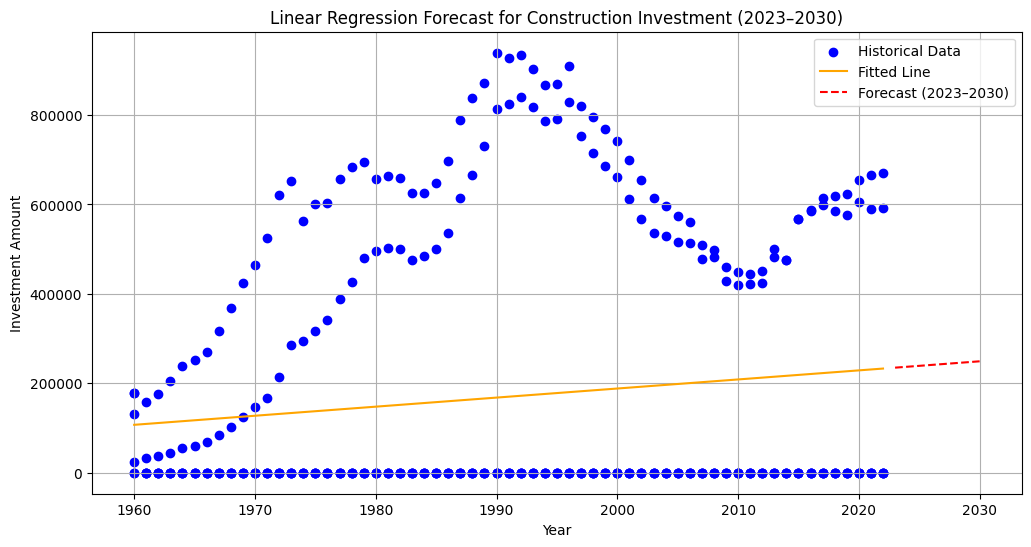

In [31]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Test the model on the test set
lr_test_predictions = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_test_predictions)
lr_mae = mean_absolute_error(y_test, lr_test_predictions)
lr_r2 = r2_score(y_test, lr_test_predictions)

print("\nLinear Regression MSE on Test Data:", lr_mse)
print("\nLinear Regression MAE on Test Data:", lr_mae)
print("\nLinear Regression R^2 Score on Test Data:", lr_r2)
print("\n")

# Forecast future investments (2023–2030)
future_years = np.arange(2023, 2031).reshape(-1, 1)  # Future years
future_years_scaled = scaler.transform(future_years)  # Scale future years
lr_forecast = lr_model.predict(future_years_scaled)

# Plot historical data and predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Historical Data', color='blue')  # Historical data points
plt.plot(X, lr_model.predict(scaler.transform(X)), label='Fitted Line', color='orange')  # Regression line
plt.plot(future_years, lr_forecast, label='Forecast (2023–2030)', linestyle='--', color='red')  # Forecast
plt.title('Linear Regression Forecast for Construction Investment (2023–2030)')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()


## Hyperparameter tuning with GridSearchCV for Linear Regression model


Best Linear Regression Parameters (Ridge): {'alpha': 10.0}

Best Linear Regression MSE on Test Data: 82495635213.37408

Best Linear Regression MAE on Test Data: 244477.1951909164

Best Linear Regression R^2 Score on Test Data: 0.0006229547506361177




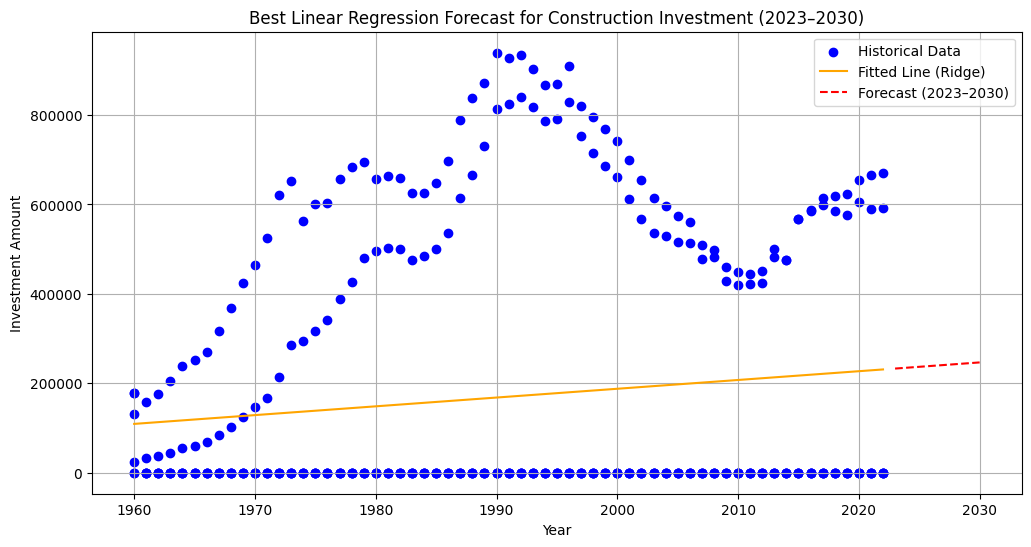

In [32]:
# Define hyperparameter grid for Ridge Regression
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]  # Regularization strength
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_lr_model = grid_search.best_estimator_
print("\nBest Linear Regression Parameters (Ridge):", grid_search.best_params_)

# Test the best model on the test set
best_lr_test_predictions = best_lr_model.predict(X_test_scaled)

# Evaluate the best model
best_lr_mse = mean_squared_error(y_test, best_lr_test_predictions)
best_lr_mae = mean_absolute_error(y_test, best_lr_test_predictions)
best_lr_r2 = r2_score(y_test, best_lr_test_predictions)

print("\nBest Linear Regression MSE on Test Data:", best_lr_mse)
print("\nBest Linear Regression MAE on Test Data:", best_lr_mae)
print("\nBest Linear Regression R^2 Score on Test Data:", best_lr_r2)
print("\n")

# Forecast future investments (2023–2030)
best_lr_forecast = best_lr_model.predict(future_years_scaled)

# Plot historical data and predictions for best model
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Historical Data', color='blue')  # Historical data points
plt.plot(X, best_lr_model.predict(scaler.transform(X)), label='Fitted Line (Ridge)', color='orange')  # Regression line
plt.plot(future_years, best_lr_forecast, label='Forecast (2023–2030)', linestyle='--', color='red')  # Forecast
plt.title('Best Linear Regression Forecast for Construction Investment (2023–2030)')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()

## Learning Curve for Linear Regression model

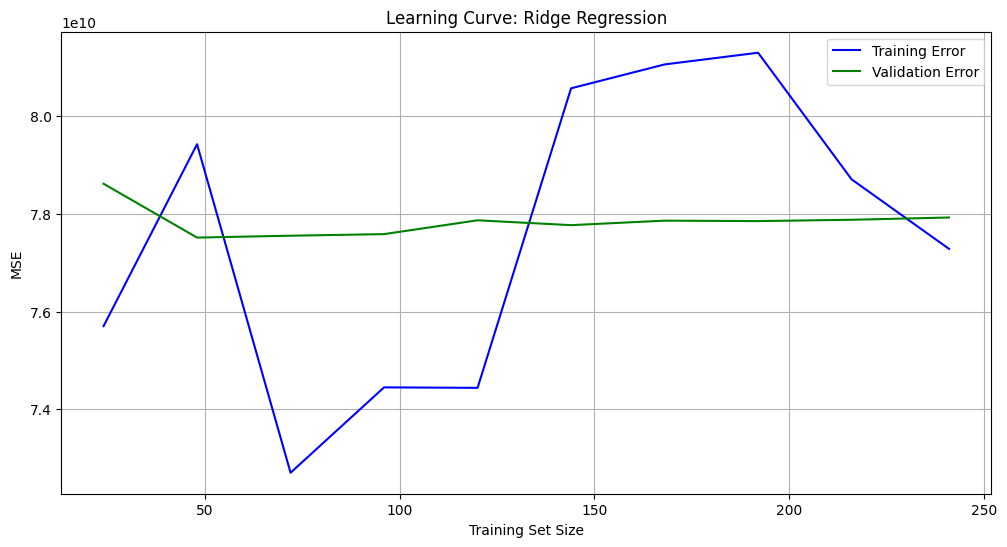

In [33]:
train_sizes, train_scores, test_scores = learning_curve(
    Ridge(alpha=grid_search.best_params_['alpha']),  # Use best alpha
    X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='green')
plt.title("Learning Curve: Ridge Regression")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

# Gradient Boosting Regressor


Gradient Boosting MSE on Test Data: 97381191139.4467

Gradient Boosting MAE on Test Data: 265407.3845030714

Gradient Boosting R^2 Score on Test Data: -0.17970516636529021




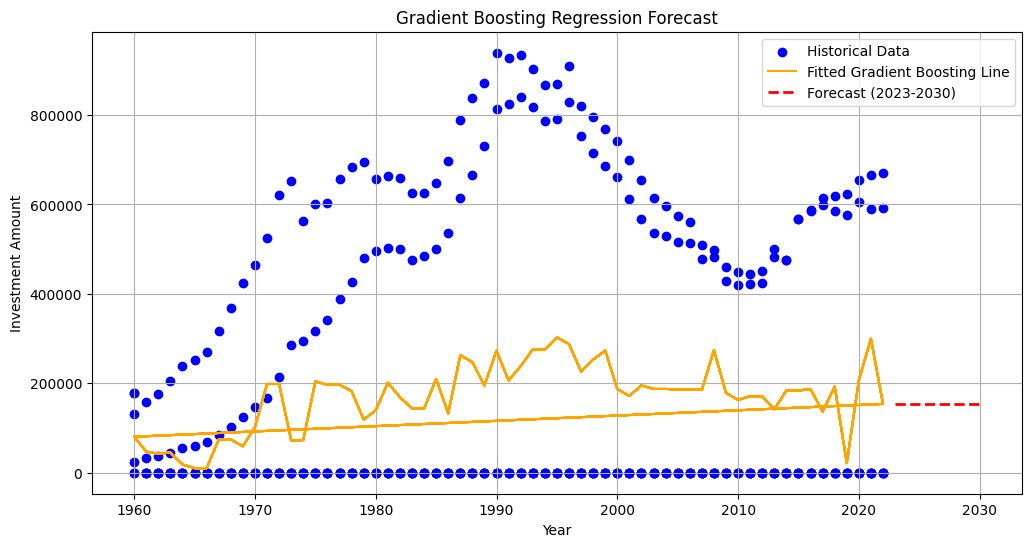

In [34]:
# Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Test predictions
gbr_test_predictions = gbr_model.predict(X_test)

# Forecast future years
future_years = np.arange(2023, 2031).reshape(-1, 1)  # Future years
gbr_forecast = gbr_model.predict(future_years)

# Evaluate performance
gbr_mse = mean_squared_error(y_test, gbr_test_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_test_predictions)
gbr_r2 = r2_score(y_test, gbr_test_predictions)

print("\nGradient Boosting MSE on Test Data:", gbr_mse)
print("\nGradient Boosting MAE on Test Data:", gbr_mae)
print("\nGradient Boosting R^2 Score on Test Data:", gbr_r2)
print("\n")

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Historical Data', color='blue')
plt.plot(X, gbr_model.predict(X), label='Fitted Gradient Boosting Line', color='orange')
plt.plot(future_years, gbr_forecast, '--r', label='Forecast (2023-2030)', linewidth=2)
plt.title('Gradient Boosting Regression Forecast')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()

## Hyperparameter tuning with GridSearchCV for Gradient Boosting Regressor


Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}

Best Gradient Boosting MSE on Test Data: 81485180928.88185

Best Gradient Boosting MAE on Test Data: 244875.42822155764

Best Gradient Boosting R^2 Score on Test Data: 0.012863903190920345




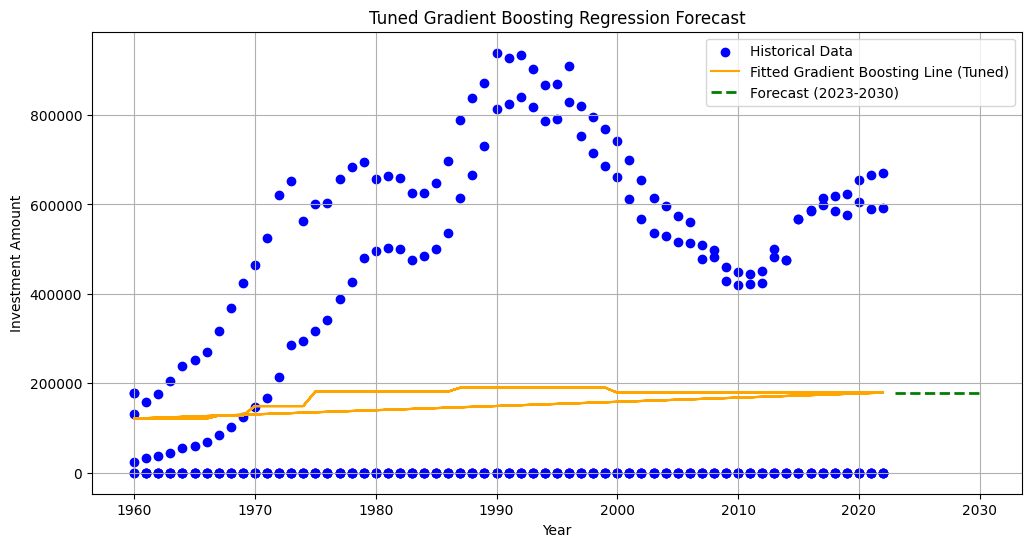

In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_gbr_model = grid_search.best_estimator_
print("\nBest Gradient Boosting Parameters:", grid_search.best_params_)

# Test the best model on the test set
best_gbr_test_predictions = best_gbr_model.predict(X_test)

# Evaluate the best model
best_gbr_mse = mean_squared_error(y_test, best_gbr_test_predictions)
best_gbr_mae = mean_absolute_error(y_test, best_gbr_test_predictions)
best_gbr_r2 = r2_score(y_test, best_gbr_test_predictions)

print("\nBest Gradient Boosting MSE on Test Data:", best_gbr_mse)
print("\nBest Gradient Boosting MAE on Test Data:", best_gbr_mae)
print("\nBest Gradient Boosting R^2 Score on Test Data:", best_gbr_r2)
print("\n")

# Forecast with the best model
best_gbr_forecast = best_gbr_model.predict(future_years)

# Plot historical data and forecast for best model
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Historical Data', color='blue')
plt.plot(X, best_gbr_model.predict(X), label='Fitted Gradient Boosting Line (Tuned)', color='orange')
plt.plot(future_years, best_gbr_forecast, '--g', label='Forecast (2023-2030)', linewidth=2)
plt.title('Tuned Gradient Boosting Regression Forecast')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()

## Learning Curve for Gradient Boosting Regressor

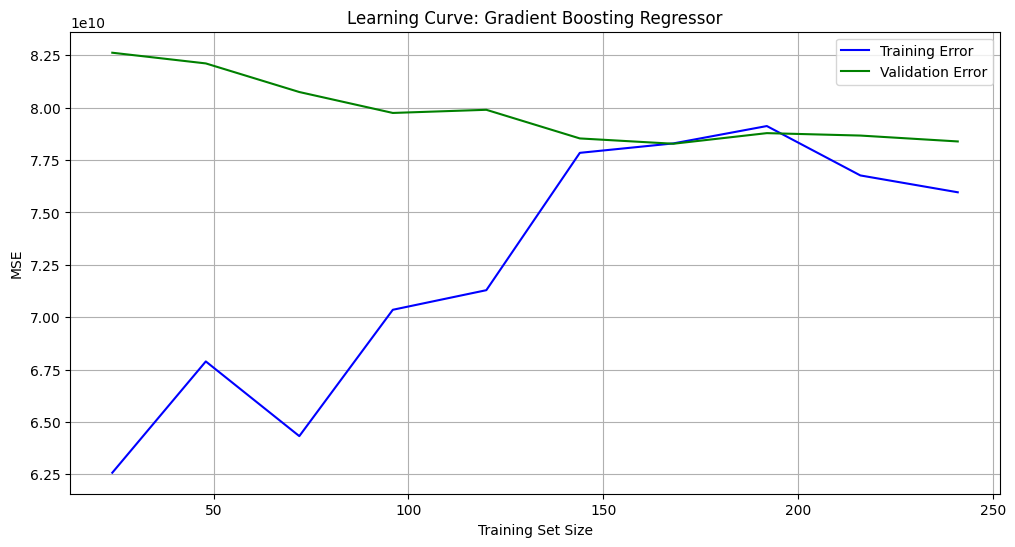

In [36]:
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(
        n_estimators=grid_search.best_params_['n_estimators'],
        learning_rate=grid_search.best_params_['learning_rate'],
        max_depth=grid_search.best_params_['max_depth'],
        random_state=42
    ),
    X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='green')
plt.title("Learning Curve: Gradient Boosting Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()


# K-Nearest Neighbors Regressor


KNN Regression MSE on Test Data: 95761607068.16844

KNN Regression MAE on Test Data: 259986.6263157895

KNN Regression R^2 Score on Test Data: -0.16008503568200538




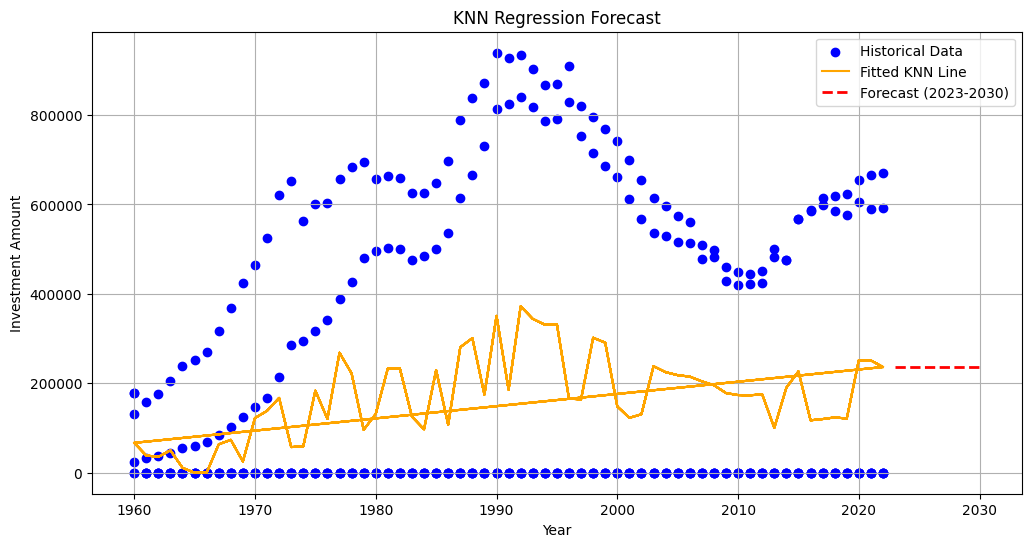

In [37]:
# Train K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Test predictions
knn_test_predictions = knn_model.predict(X_test_scaled)

# Forecast future years
future_years = np.arange(2023, 2031).reshape(-1, 1)  # Future years
future_years_scaled = scaler.transform(future_years)  # Scale future years
knn_forecast = knn_model.predict(future_years_scaled)

# Evaluate performance
knn_mse = mean_squared_error(y_test, knn_test_predictions)
knn_mae = mean_absolute_error(y_test, knn_test_predictions)
knn_r2 = r2_score(y_test, knn_test_predictions)

print("\nKNN Regression MSE on Test Data:", knn_mse)
print("\nKNN Regression MAE on Test Data:", knn_mae)
print("\nKNN Regression R^2 Score on Test Data:", knn_r2)
print("\n")

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Historical Data', color='blue')
plt.plot(X, knn_model.predict(scaler.transform(X)), label='Fitted KNN Line', color='orange')
plt.plot(future_years, knn_forecast, '--r', label='Forecast (2023-2030)', linewidth=2)
plt.title('KNN Regression Forecast')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()


## Hyperparameter tuning with GridSearchCV for K-Nearest Neighbors Regressor

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best KNN Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

Best KNN Regression MSE on Test Data: 87087157874.2249

Best KNN Regression MAE on Test Data: 249970.82118421048

Best KNN Regression R^2 Score on Test Data: -0.05500013776969004




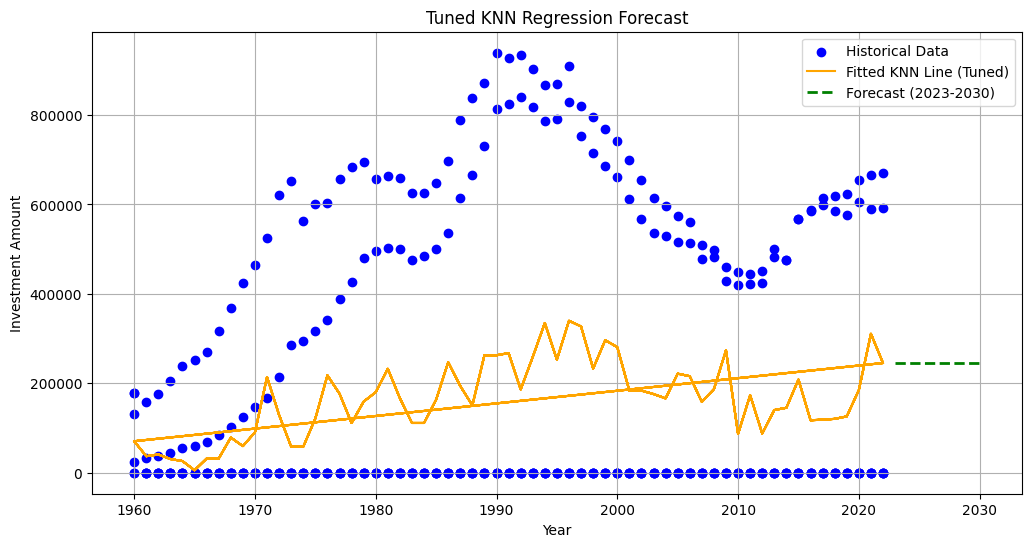

In [38]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],  # Weighting scheme for KNN
    'p': [1, 2]  # Distance metric: 1 = Manhattan, 2 = Euclidean
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_knn_model = grid_search.best_estimator_
print("\nBest KNN Parameters:", grid_search.best_params_)

# Test the best model on the test set
best_knn_test_predictions = best_knn_model.predict(X_test_scaled)

# Evaluate the best model
best_knn_mse = mean_squared_error(y_test, best_knn_test_predictions)
best_knn_mae = mean_absolute_error(y_test, best_knn_test_predictions)
best_knn_r2 = r2_score(y_test, best_knn_test_predictions)

print("\nBest KNN Regression MSE on Test Data:", best_knn_mse)
print("\nBest KNN Regression MAE on Test Data:", best_knn_mae)
print("\nBest KNN Regression R^2 Score on Test Data:", best_knn_r2)
print("\n")
# Forecast with the best model
best_knn_forecast = best_knn_model.predict(future_years_scaled)

# Plot historical data and forecast for best model
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Historical Data', color='blue')
plt.plot(X, best_knn_model.predict(scaler.transform(X)), label='Fitted KNN Line (Tuned)', color='orange')
plt.plot(future_years, best_knn_forecast, '--g', label='Forecast (2023-2030)', linewidth=2)
plt.title('Tuned KNN Regression Forecast')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()


## Learning Curve for K-Nearest Neighbors Regressor

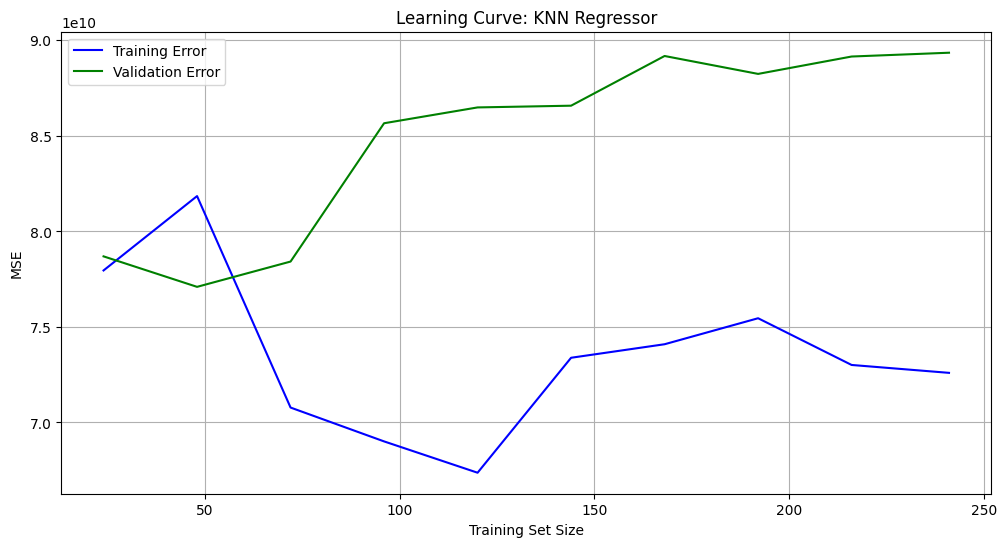

In [39]:
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsRegressor(
        n_neighbors=grid_search.best_params_['n_neighbors'],
        weights=grid_search.best_params_['weights'],
        p=grid_search.best_params_['p']
    ),
    X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='green')
plt.title("Learning Curve: KNN Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()


# Ensemble Model check

Best Model Selected: Gradient Boosting

Performance: {'MSE': 81485180928.88185, 'MAE': 244875.42822155764, 'R2': 0.012863903190920345}



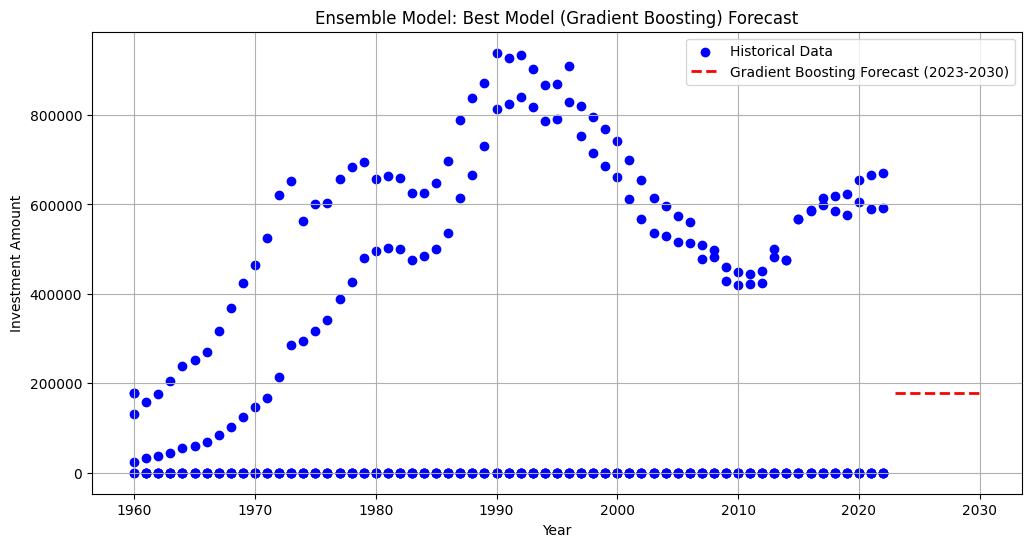

In [40]:
# Store models and their performance
models = {
    "Decision Tree": best_dt_model,
    "Random Forest": best_rf_model,
    "Gradient Boosting": best_gbr_model,
    "KNN": best_knn_model,
    "Linear Regression": best_lr_model
}

# Evaluate each model on the test set
performance = {}
for name, model in models.items():
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    performance[name] = {"MSE": mse, "MAE": mae, "R2": r2}

# Select the best model based on MSE
best_model_name = min(performance, key=lambda x: performance[x]["MSE"])
best_model = models[best_model_name]

print(f"Best Model Selected: {best_model_name}\n")
print(f"Performance: {performance[best_model_name]}\n")

# Forecast future years using the best model
future_forecast = best_model.predict(future_years)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Historical Data', color='blue')
plt.plot(future_years, future_forecast, '--r', label=f'{best_model_name} Forecast (2023-2030)', linewidth=2)
plt.title(f'Ensemble Model: Best Model ({best_model_name}) Forecast')
plt.xlabel('Year')
plt.ylabel('Investment Amount')
plt.legend()
plt.grid()
plt.show()


# Display performance comparison for all models

In [41]:
table = PrettyTable()
table.field_names = ["Model", "MSE", "MAE", "R²"]

# Add rows for each model
for name, metrics in performance.items():
    table.add_row([name, metrics["MSE"], metrics["MAE"], metrics["R2"]])

# Print the table
print("Model Performance Comparison:")
print(table)


Model Performance Comparison:
+-------------------+--------------------+--------------------+-----------------------+
|       Model       |        MSE         |        MAE         |           R²          |
+-------------------+--------------------+--------------------+-----------------------+
|   Decision Tree   | 83175713430.16109  | 244022.73553737058 | -0.007615718205492117 |
|   Random Forest   | 83659828474.57303  | 247738.77920834944 | -0.013480434094930382 |
| Gradient Boosting | 81485180928.88185  | 244875.42822155764 |  0.012863903190920345 |
|        KNN        | 84199092546.61424  | 270226.1231578947  | -0.020013241964483175 |
| Linear Regression | 4973834566351997.0 | 70522192.50033526  |   -60253.53443231577  |
+-------------------+--------------------+--------------------+-----------------------+


<ipython-input-42-58bc85cfe796>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-42-58bc85cfe796>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-42-58bc85cfe796>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


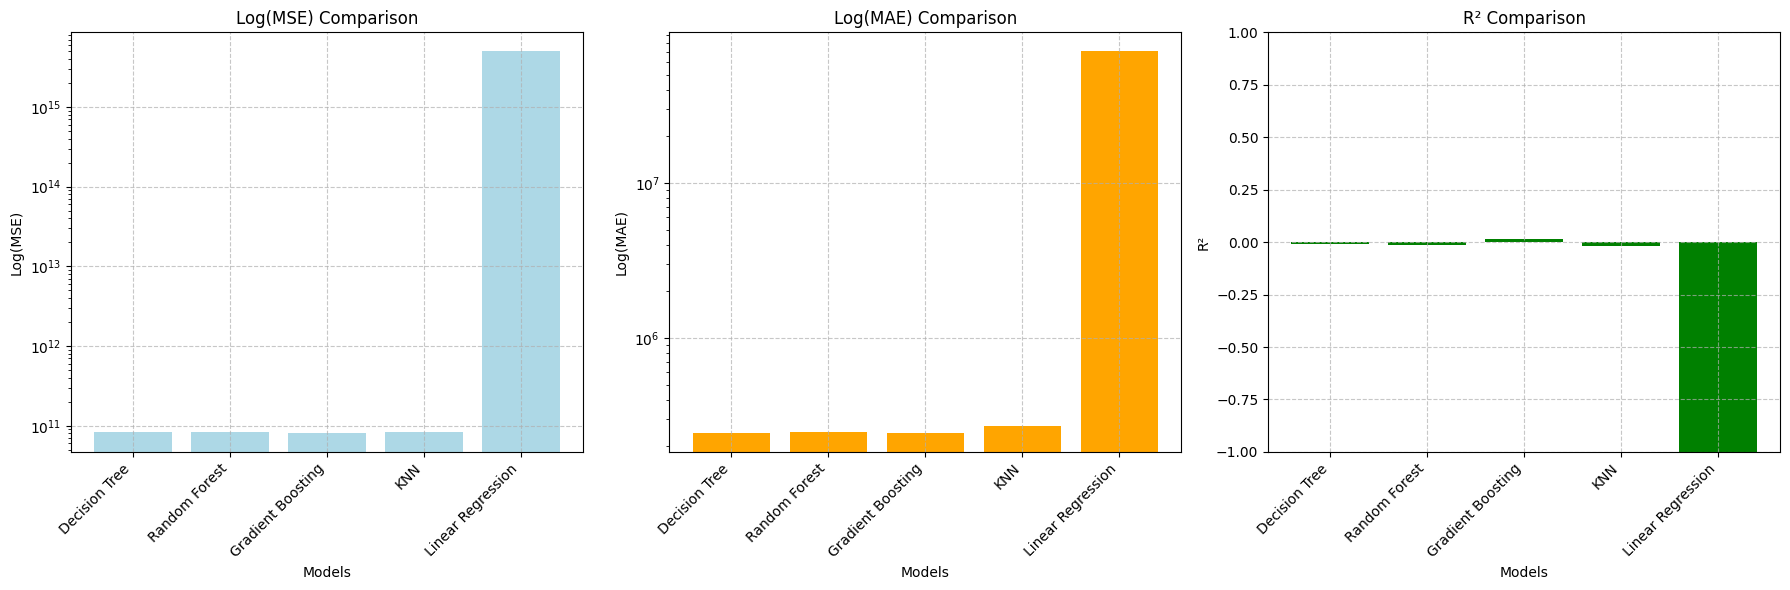

In [42]:
# Extract values from the performance dictionary
models = list(performance.keys())
mse_values = [metrics['MSE'] for metrics in performance.values()]
mae_values = [metrics['MAE'] for metrics in performance.values()]
r2_values = [metrics['R2'] for metrics in performance.values()]

# Create subplots for MSE, MAE, and R²
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Log(MSE)
axes[0].bar(models, mse_values, color='lightblue')
axes[0].set_title("Log(MSE) Comparison")
axes[0].set_xlabel("Models")
axes[0].set_ylabel("Log(MSE)")
axes[0].set_yscale('log')  # Using log scale for better comparison
axes[0].grid(True, axis='both', linestyle='--', alpha=0.7)  # Added grid lines for y-axis

# Plot Log(MAE)
axes[1].bar(models, mae_values, color='orange')
axes[1].set_title("Log(MAE) Comparison")
axes[1].set_xlabel("Models")
axes[1].set_ylabel("Log(MAE)")
axes[1].set_yscale('log')  # Using log scale for better comparison
axes[1].grid(True, axis='both', linestyle='--', alpha=0.7)  # Added grid lines for y-axis

# Plot R² (Raw values)
axes[2].bar(models, r2_values, color='green')
axes[2].set_title("R² Comparison")
axes[2].set_xlabel("Models")
axes[2].set_ylabel("R²")
axes[2].set_ylim([-1, 1])  # Limit the range to [-1, 1] for better visualization
axes[2].grid(True, axis='both', linestyle='--', alpha=0.7)  # Added grid lines for y-axis

# Rotate the x-axis labels to make them readable
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()
